# Вариант 7

In [ ]:
from ctypes import c_double
import numpy as np
from decimal import Decimal
from scipy.stats import laplace
import scipy
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
f1 = open("1.txt")
f1 = f1.read().split('\n')[:-1]
f1 = [Decimal(i) for i in f1]
f1 = np.array(f1)

f3 = open("3.txt")
f3 = f3.read().split('\n')[:-1]
f3 = [Decimal(i) for i in f3]
f3 = np.array(f3)

f4 = open("4.txt")
f4 = f4.read().split('\n')[:-1]
f4 = [Decimal(i) for i in f4]
f4 = np.array(f4)

f6 = open("6.txt")
f6 = f6.read().split('\n')[:-1]
f6 = [Decimal(i) for i in f6]
f6 = np.array(f6)

## Файл 1

Число групп:  7
Длина интервала: 4.872440002774216142857142857
Значения границ:  [Decimal('-13.89090296498333300020816682'), Decimal('-9.018462962209116857351023963'), Decimal('-4.146022959434900714493881106'), Decimal('0.726417043339315428363261751'), Decimal('5.598857046113531571220404608'), Decimal('10.47129704888774771407754746'), Decimal('15.34373705166196385693469032'), Decimal('20.21617705443617999979183318'), Decimal('25.08861705721039614264897604')]
Вариационный ряд:  [Decimal('-13.880902964983333'), Decimal('-11.973461600131193'), Decimal('-8.60306312221386'), Decimal('-8.575031785244422'), Decimal('-7.059577752762593'), Decimal('-7.053778194485358'), Decimal('-5.898667136288785'), Decimal('-5.518194658744493'), Decimal('-3.8428971612681195'), Decimal('-3.102676614746019'), Decimal('-2.398392455952511'), Decimal('-2.0029364287974145'), Decimal('-1.6091353308474026'), Decimal('1.1824524507657572'), Decimal('1.1986348809602803'), Decimal('2.2419399899771673'), Decimal('2.337629

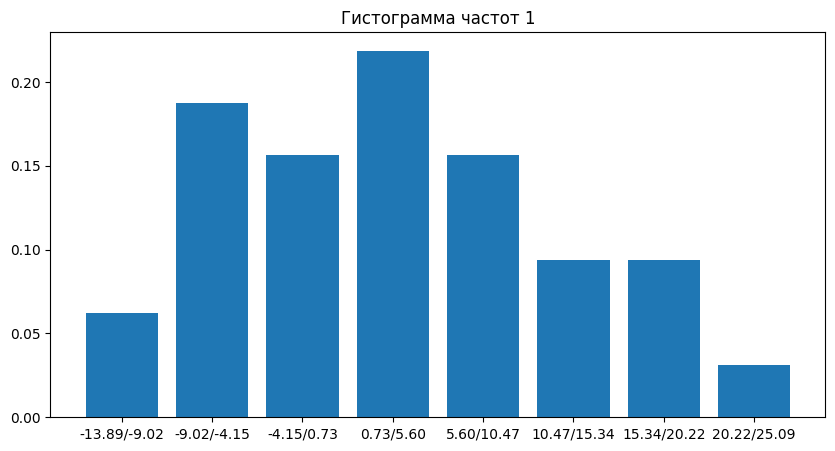

In [ ]:
#рассчитать число групп
m = ceil(3.332 * log(len(f1), 10)) + 1
print("Число групп: ", m)

#вычислить значения границ
h = (max(f1) - min(f1)) / m
print("Длина интервала:", h)
x = [min(f1) - Decimal(0.01)]
for i in range(m + 1):
  x.append(x[-1] + h)
print("Значения границ: ", x)

median = [] # середины интервалов
for i in range(len(x) - 1):
  median.append(sum(x[i:i+2]) / 2)
median = np.array(median)

#построить вариационный ряд
f1 = sorted(f1)
print("Вариационный ряд: ", f1)

#построить гистограмму
plt.title("Гистограмма частот 1")
abs_freq = np.zeros(m + 1) # абсолютная частота
for i in f1:
  j = 0
  while i > x[j + 1]:
    j += 1
  abs_freq[j] += 1

rel_freq = abs_freq / len(f1) # относительная частота
x_labels = ["/".join([str(round(x[i], 2)), str(round(x[i + 1], 2))]) for i in range(len(x) - 1)]

plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams['font.size'] = 10
plt.bar(x_labels, rel_freq)
plt.show()

#повернуть x_labels

### Критерий согласия Пирсона

In [ ]:
# ПЕРЕДЕЛАТЬ
# считать не i из f1, а среднее из каждого интервала
x_v = []
for i in f1:
  h_i = 0
  while i < x[h_i]:
    h_i += 1
  x_v.append(i * Decimal(abs_freq[h_i - 1]))
x_v = np.sum(x_v) / len(f1) # выборочное среднее


s = np.std(f1)
p = []
for i in range(len(x) - 1):
  s1 = scipy.stats.norm.cdf(float((x[i + 1] - x_v) / s)) - 0.5
  s2 = scipy.stats.norm.cdf(float((x[i] - x_v) / s)) - 0.5
  p.append(s1 - s2)


abs_teor_freq = np.array(p) * len(f1)

# критическое значение
a = 0.05
k = m - 1 # число степеней свободы
ppf = scipy.stats.chi2.ppf(1-a, k - 2)

# критерий Пирсона
x_2 = sum((abs_freq - abs_teor_freq) ** 2 / abs_teor_freq)
print("Полученное значение критерия Пирсона:", x_2)
print("Критическое значение:", ppf)

print("Полученное значение критерия Пирсона меньше критического значения, поэтому гипотеза (норм. распределение) подтверждается")

Полученное значение критерия Пирсона: 2.8227101398614955
Критическое значение: 9.487729036781154
Полученное значение критерия Пирсона меньше критического значения, поэтому гипотеза (норм. распределение) подтверждается


In [ ]:
lambd = 1 / x_v
p = []
for i in range(len(x) - 1):
  s1 = np.exp((-1) * lambd * x[i])
  s2 = np.exp((-1) * lambd * x[i + 1])
  p.append(float(s1) - float(s2))

abs_teor_freq = np.array(p) * len(f1)
x_2 = sum((abs_freq - abs_teor_freq) ** 2 / abs_teor_freq)

print("Полученное значение критерия Пирсона:", x_2)

ppf = scipy.stats.chi2.ppf(1-a, k - 1)
print("Критическое значение:", ppf)

print("Полученное значение критерия Пирсона больше критического значения, поэтому гипотеза (показ. распределение) отвергается")

Полученное значение критерия Пирсона: 9108.901599420591
Критическое значение: 11.070497693516351
Полученное значение критерия Пирсона больше критического значения, поэтому гипотеза (показ. распределение) отвергается


### Метод анаморфоз

0.8711104167138491


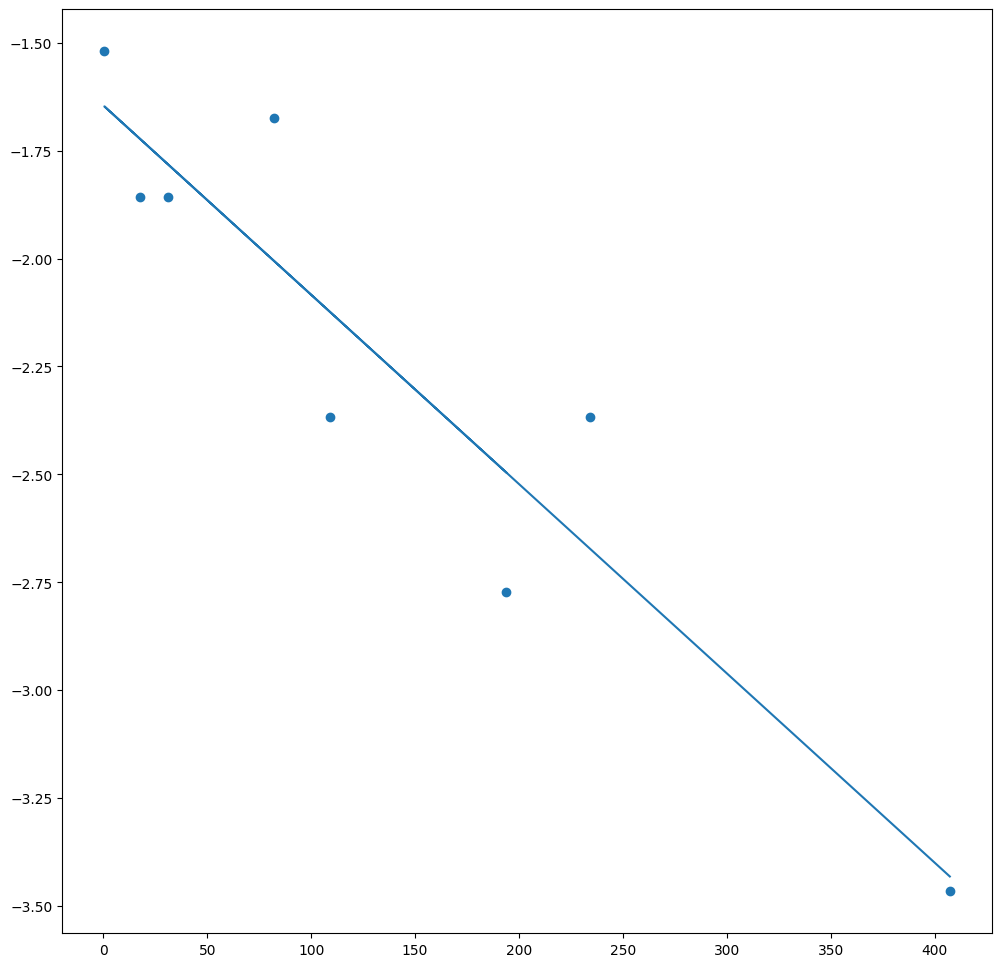

In [ ]:
y = np.log(rel_freq)
x_n = (median - x_v) ** 2
plt.scatter(x_n, y)


model = LinearRegression()
model.fit(x_n.reshape(-1, 1), y.reshape(-1, 1))
pred = model.predict(x_n.reshape(-1, 1))
plt.plot(x_n, pred)

print(r2_score(y, pred))

# figure(10, 10)

0.2918612009435593


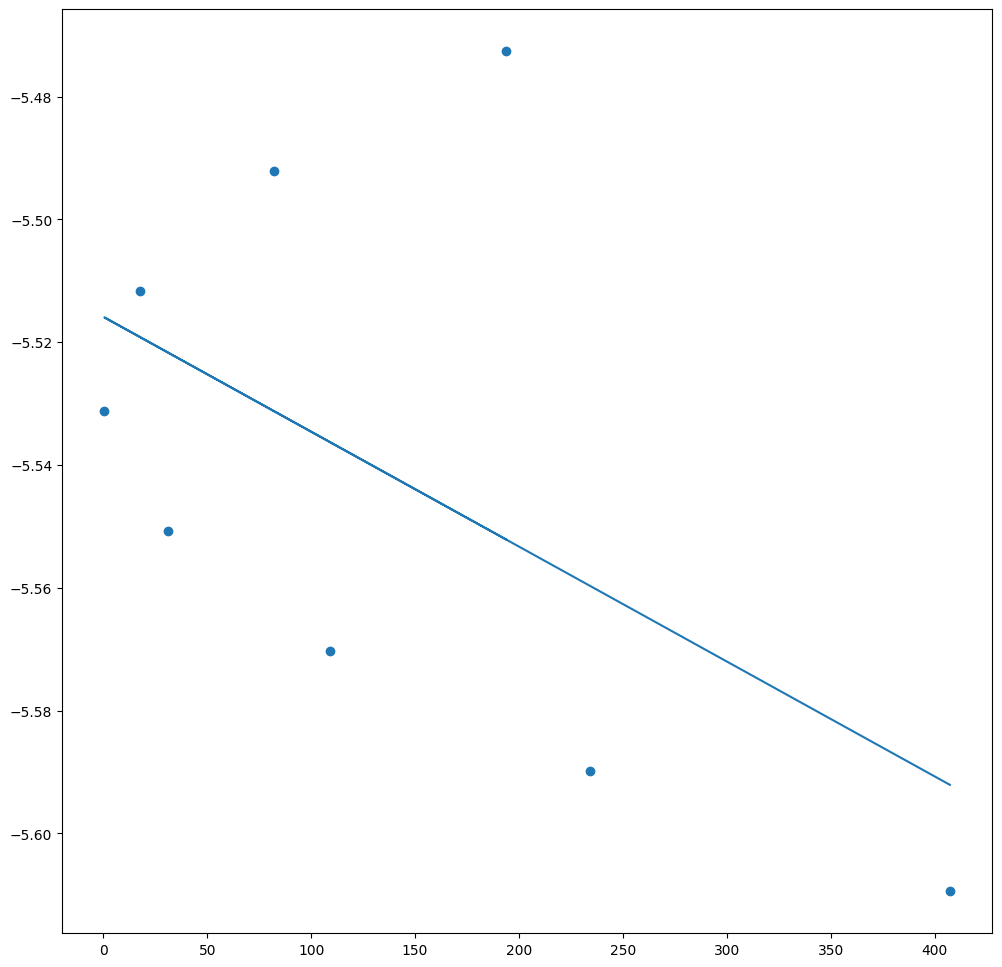

In [ ]:
std = median.std()
lambd = float(1 / (2 * std * std))
y = np.log(lambd) - lambd * np.array([float(i) for i in median])
plt.scatter(x_n, y)


model = LinearRegression()
model.fit(x_n.reshape(-1, 1), y.reshape(-1, 1))
pred = model.predict(x_n.reshape(-1, 1))
plt.plot(x_n, pred)

print(r2_score(y, pred))

In [ ]:
#data = {"left-right":x_labels, "ni": abs_freq, "wi": rel_freq, "pi":, "np"}

## Файл 3

Число групп:  7
Длина интервала: 1.1936137896209925
Значения границ:  [Decimal('0.1178176217700934997918331829'), Decimal('1.311431411391085999791833183'), Decimal('2.505045201012078499791833183'), Decimal('3.698658990633070999791833183'), Decimal('4.892272780254063499791833183'), Decimal('6.085886569875055999791833183'), Decimal('7.279500359496048499791833183'), Decimal('8.473114149117040999791833183'), Decimal('9.666727938738033499791833183')]
Вариационный ряд:  [Decimal('0.1278176217700935'), Decimal('0.22423552529178895'), Decimal('0.36096216884155113'), Decimal('0.3721731632273307'), Decimal('0.4152736060078762'), Decimal('0.43496439656328045'), Decimal('0.4441391738766205'), Decimal('0.4526915976310764'), Decimal('0.5173800723726923'), Decimal('0.679463859104114'), Decimal('0.8519500554996043'), Decimal('1.6613567713367676'), Decimal('1.8090509488996889'), Decimal('1.8605942044799921'), Decimal('1.938141107457539'), Decimal('2.172773795993832'), Decimal('2.2112386294877755'), Dec

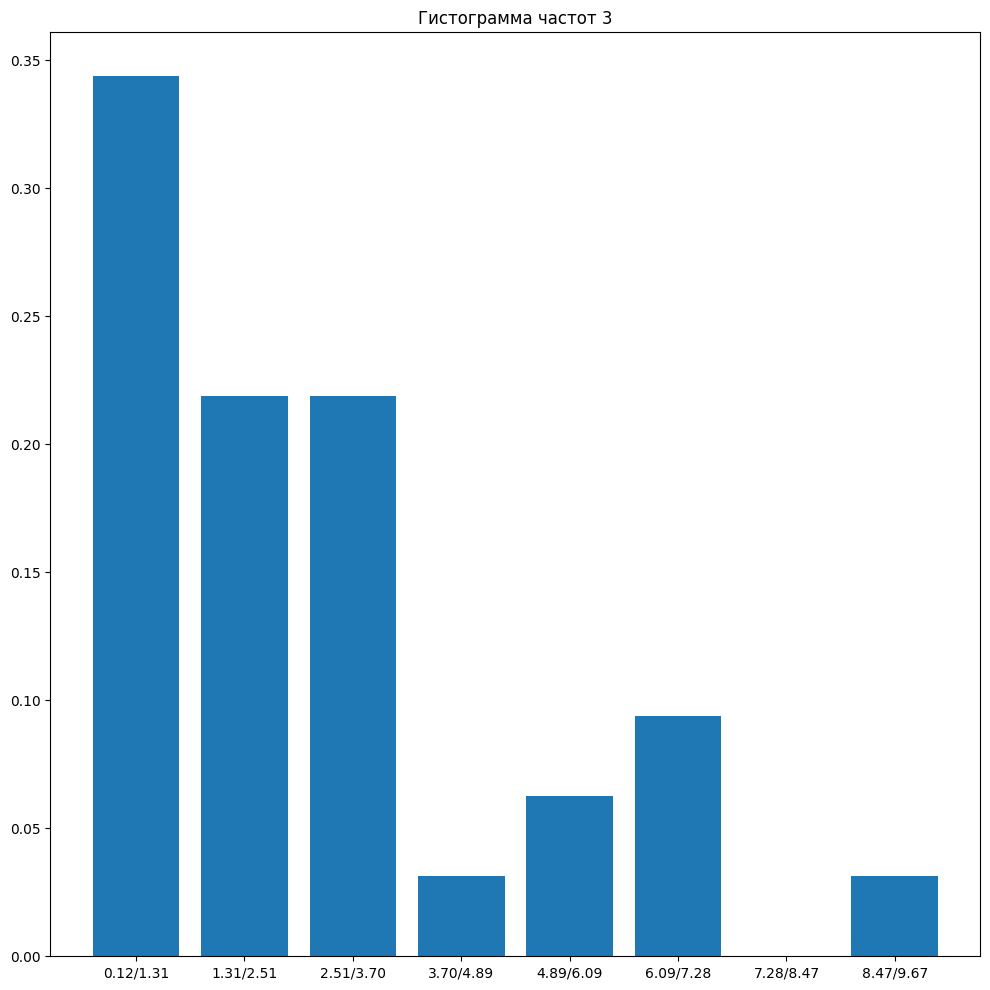

In [ ]:
#рассчитать число групп
m = ceil(3.332 * log(len(f3), 10)) + 1
print("Число групп: ", m)

#вычислить значения границ
h = (max(f3) - min(f3)) / m
print("Длина интервала:", h)
x = [min(f3) - Decimal(0.01)]
for i in range(m + 1):
  x.append(x[-1] + h)
print("Значения границ: ", x)

median = [] # середины интервалов
for i in range(len(x) - 1):
  median.append(sum(x[i:i+2]) / 2)
median = np.array(median)

#построить вариационный ряд
f3 = sorted(f3)
print("Вариационный ряд: ", f3)

#построить гистограмму
plt.title("Гистограмма частот 3")
abs_freq = np.zeros(m + 1) # абсолютная частота
for i in f3:
  j = 0
  while i > x[j + 1]:
    j += 1
  abs_freq[j] += 1

rel_freq = abs_freq / len(f3) # относительная частота
x_labels = ["/".join([str(round(x[i], 2)), str(round(x[i + 1], 2))]) for i in range(len(x) - 1)]

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams['font.size'] = 10
plt.bar(x_labels, rel_freq)
plt.show()

In [ ]:
x_v = []
for i in f3:
  h_i = 0
  while i < x[h_i]:
    h_i += 1
  x_v.append(i * Decimal(abs_freq[h_i - 1]))
x_v = np.sum(x_v) / len(f3) # выборочное среднее


s = np.std(f3)
p = []
for i in range(len(x) - 1):
  s1 = scipy.stats.norm.cdf(float((x[i + 1] - x_v) / s)) - 0.5
  s2 = scipy.stats.norm.cdf(float((x[i] - x_v) / s)) - 0.5
  p.append(s1 - s2)


abs_teor_freq = np.array(p) * len(f3)

# критическое значение
a = 0.05
k = m - 1 # число степеней свободы
ppf = scipy.stats.chi2.ppf(1-a, k - 2)

# критерий Пирсона
x_2 = sum((abs_freq - abs_teor_freq) ** 2 / abs_teor_freq)
print("Полученное значение критерия Пирсона:", x_2)
print("Критическое значение:", ppf)

print("Полученное значение критерия Пирсона больше критического значения, поэтому гипотеза (норм. распределение) отвергается")

Полученное значение критерия Пирсона: 21.01207365644219
Критическое значение: 9.487729036781154
Полученное значение критерия Пирсона больше критического значения, поэтому гипотеза (норм. распределение) отвергается


In [ ]:
lambd = float(1 / x_v)
p = []
for i in range(len(x) - 1):
  s1 = np.exp((-1) * lambd * float(x[i]))
  s2 = np.exp((-1) * lambd * float(x[i + 1]))
  p.append(float(s1) - float(s2))

abs_teor_freq = np.array(p) * len(f3)
print(abs_teor_freq)
x_2 = sum((abs_freq - abs_teor_freq) ** 2 / abs_teor_freq)

print("Полученное значение критерия Пирсона:", x_2)

ppf = scipy.stats.chi2.ppf(1-a, k - 1)
print("Критическое значение:", ppf)

print("Полученное значение критерия Пирсона меньше критического значения, поэтому гипотеза (показ. распределение) подтверждается")

[11.14401611  7.08570831  4.50531135  2.86461557  1.82141072  1.15810897
  0.73636132  0.46820118]
Полученное значение критерия Пирсона: 6.88526920335082
Критическое значение: 11.070497693516351
Полученное значение критерия Пирсона меньше критического значения, поэтому гипотеза (показ. распределение) подтверждается


[-1.06784063 -1.51982575 -1.51982575 -3.4657359  -2.77258872 -2.36712361
 -3.4657359 ]
0.34319505566580233


<ipython-input-12-25533c0fa02b>:1: RuntimeWarning: divide by zero encountered in log
  y = np.log(rel_freq)


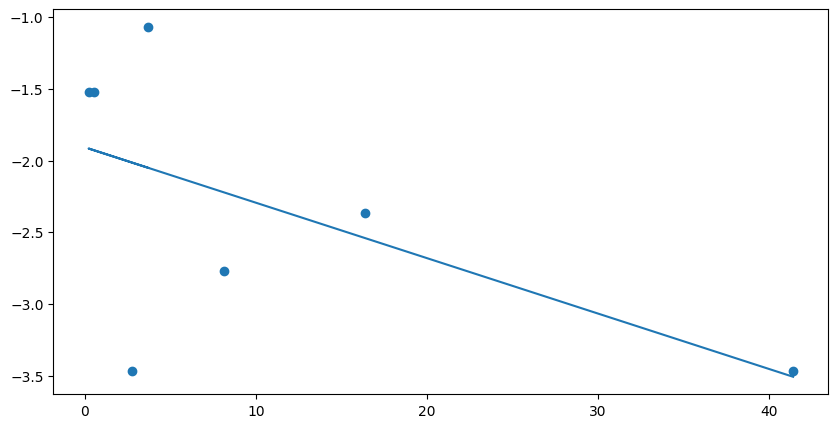

In [ ]:
y = np.log(rel_freq)
x_n = (median - x_v) ** 2
plt.scatter(x_n, y)
y[(y == np.inf) | (y == -np.inf)] = np.nan
x_n_y = x_n[~np.isnan(y)]
y = y[~np.isnan(y)]

print(y)


model = LinearRegression()
model.fit(x_n_y.reshape(-1, 1), np.array([float(i) for i in y]).reshape(-1, 1))
pred = model.predict(x_n_y.reshape(-1, 1))
plt.plot(x_n_y, pred)

print(r2_score(y, pred))

0.7813431382162107


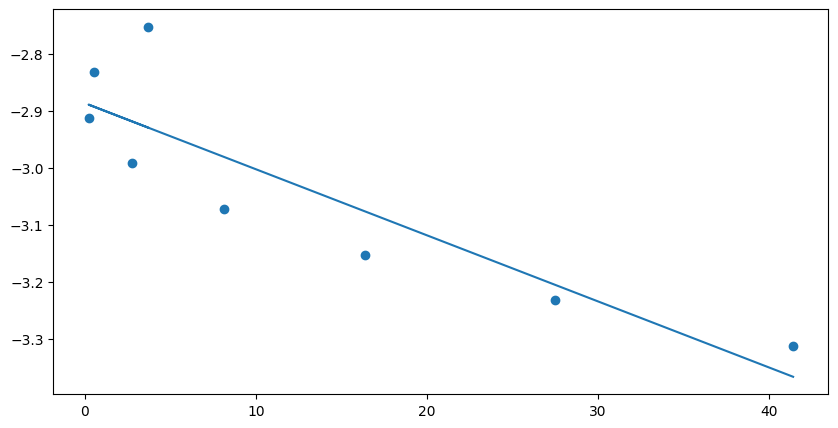

In [ ]:
std = median.std()
lambd = float(1 / (2 * std * std))
y = np.log(lambd) - lambd * np.array([float(i) for i in median])
plt.scatter(x_n, y)


model = LinearRegression()
model.fit(x_n.reshape(-1, 1), y.reshape(-1, 1))
pred = model.predict(x_n.reshape(-1, 1))
plt.plot(x_n, pred)

print(r2_score(y, pred))

## Файл 4

Число групп:  9
Длина интервала: 3.084616975735755888888888889
Значения границ:  [Decimal('-20.65706110133108700020816682'), Decimal('-17.57244412559533111131927793'), Decimal('-14.48782714985957522243038904'), Decimal('-11.40321017412381933354150015'), Decimal('-8.318593198388063444652611261'), Decimal('-5.233976222652307555763722372'), Decimal('-2.149359246916551666874833483'), Decimal('0.935257728819204222014055406'), Decimal('4.019874704554960110902944295'), Decimal('7.104491680290715999791833184'), Decimal('10.18910865602647188868072207')]
Вариационный ряд:  [Decimal('-20.647061101331087'), Decimal('-19.644608769350754'), Decimal('-16.964273235789364'), Decimal('-16.71411559098771'), Decimal('-14.324255568753774'), Decimal('-13.223499495140956'), Decimal('-12.605678427177882'), Decimal('-12.021047837421445'), Decimal('-11.998996312717654'), Decimal('-11.93050316069533'), Decimal('-11.865418884080096'), Decimal('-11.728031969298524'), Decimal('-11.725007955698668'), Decimal('-11.44

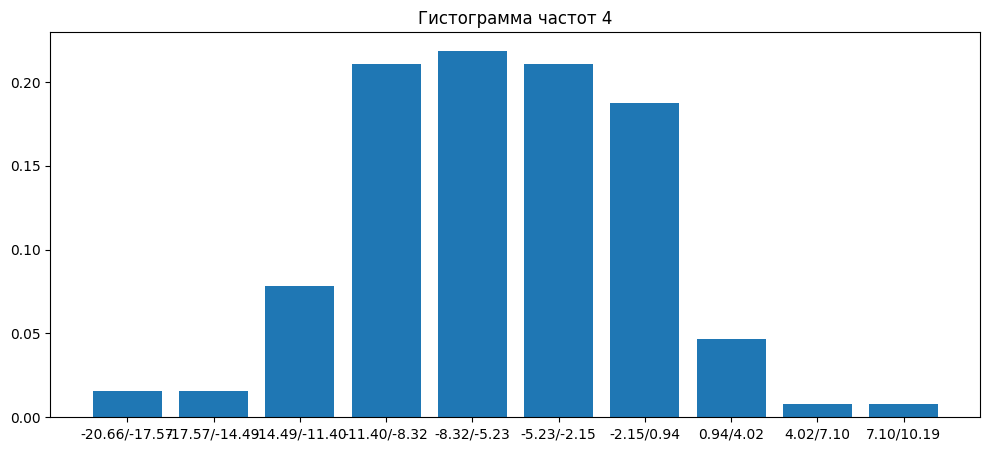

In [ ]:
#рассчитать число групп
m = ceil(3.332 * log(len(f4), 10)) + 1
print("Число групп: ", m)

#вычислить значения границ
h = (max(f4) - min(f4)) / m
print("Длина интервала:", h)
x = [min(f4) - Decimal(0.01)]
for i in range(m + 1):
  x.append(x[-1] + h)
print("Значения границ: ", x)

median = [] # середины интервалов
for i in range(len(x) - 1):
  median.append(sum(x[i:i+2]) / 2)
median = np.array(median)

#построить вариационный ряд
f4 = sorted(f4)
print("Вариационный ряд: ", f4)

#построить гистограмму
plt.title("Гистограмма частот 4")
abs_freq = np.zeros(m + 1) # абсолютная частота
for i in f4:
  j = 0
  while i > x[j + 1]:
    j += 1
  abs_freq[j] += 1

rel_freq = abs_freq / len(f4) # относительная частота
x_labels = ["/".join([str(round(x[i], 2)), str(round(x[i + 1], 2))]) for i in range(len(x) - 1)]

plt.rcParams["figure.figsize"] = [5, 12]
plt.rcParams['font.size'] = 10
plt.bar(x_labels, rel_freq)
plt.show()

In [ ]:
x_v = []
for i in f4:
  h_i = 0
  while i < x[h_i]:
    h_i += 1
  x_v.append(i * Decimal(abs_freq[h_i - 1]))
x_v = np.sum(x_v) / len(f4) # выборочное среднее


s = np.std(f4)
p = []
for i in range(len(x) - 1):
  s1 = scipy.stats.norm.cdf(float((x[i + 1] - x_v) / s)) - 0.5
  s2 = scipy.stats.norm.cdf(float((x[i] - x_v) / s)) - 0.5
  p.append(s1 - s2)


abs_teor_freq = np.array(p) * len(f4)

# критическое значение
a = 0.05
k = m - 1 # число степеней свободы
ppf = scipy.stats.chi2.ppf(1-a, k)

# критерий Пирсона
x_2 = sum((abs_freq - abs_teor_freq) ** 2 / abs_teor_freq)
print("Полученное значение критерия Пирсона:", x_2)
print("Критическое значение:", ppf)

print("Полученное значение критерия Пирсона меньше критического значения, поэтому гипотеза (норм. распределение) подтверждается")

Полученное значение критерия Пирсона: 7.256654826007761
Критическое значение: 15.50731305586545
Полученное значение критерия Пирсона меньше критического значения, поэтому гипотеза (норм. распределение) подтверждается


In [ ]:
lambd = 1 / x_v
p = []
for i in range(len(x) - 1):
  s1 = np.exp((-1) * lambd * x[i])
  s1 = np.exp((-1) * lambd * x[i + 1])
  p.append(float(s1) - float(s2))

abs_teor_freq = np.array(p) * len(f4)
x_2 = sum((abs_freq - abs_teor_freq) ** 2 / abs_teor_freq)

print("Полученное значение критерия Пирсона:", x_2)
print("Критическое значение:", ppf)

print("Полученное значение критерия Пирсона больше критического значения, поэтому гипотеза (показ. распределение) отвергается")

Полученное значение критерия Пирсона: 856.4038853863871
Критическое значение: 15.50731305586545
Полученное значение критерия Пирсона больше критического значения, поэтому гипотеза (показ. распределение) отвергается


0.8688429238738121


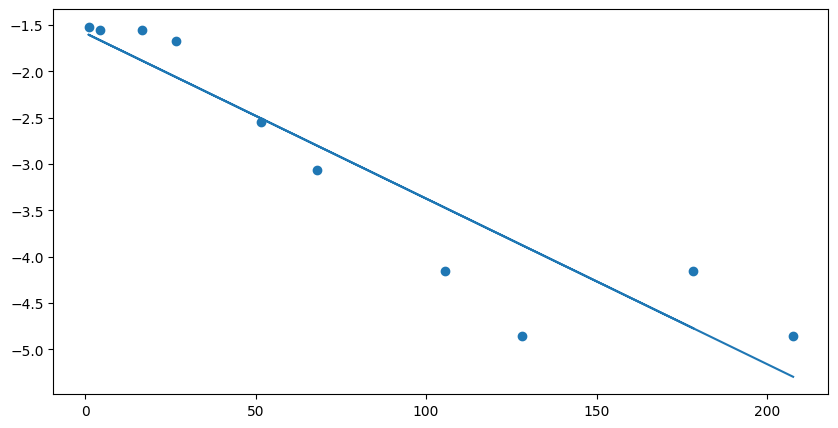

In [ ]:
y = np.log(rel_freq)
x_n = (median - x_v) ** 2
plt.scatter(x_n, y)


model = LinearRegression()
model.fit(x_n.reshape(-1, 1), y.reshape(-1, 1))
pred = model.predict(x_n.reshape(-1, 1))
plt.plot(x_n, pred)

print(r2_score(y, pred))

0.0180179873638735


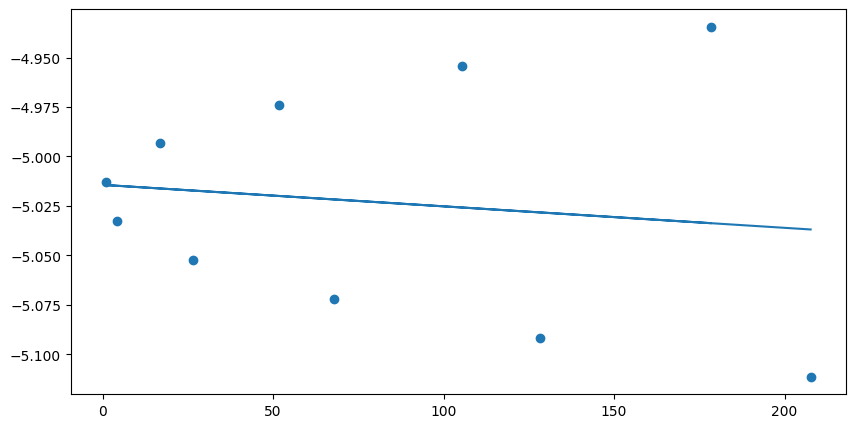

In [ ]:
std = median.std()
lambd = float(1 / (2 * std * std))
y = np.log(lambd) - lambd * np.array([float(i) for i in median])
plt.scatter(x_n, y)


model = LinearRegression()
model.fit(x_n.reshape(-1, 1), y.reshape(-1, 1))
pred = model.predict(x_n.reshape(-1, 1))
plt.plot(x_n, pred)

print(r2_score(y, pred))

## Файл 6

Число групп:  9
Длина интервала: 1.156735213564484126666666667
Значения границ:  [Decimal('0.03775042791145885979183318288'), Decimal('1.194485641475942986458499850'), Decimal('2.351220855040427113125166517'), Decimal('3.507956068604911239791833184'), Decimal('4.664691282169395366458499851'), Decimal('5.821426495733879493125166518'), Decimal('6.978161709298363619791833185'), Decimal('8.134896922862847746458499852'), Decimal('9.291632136427331873125166519'), Decimal('10.44836734999181599979183319'), Decimal('11.60510256355630012645849986')]
Вариационный ряд:  [Decimal('0.04775042791145886'), Decimal('0.061882870248669'), Decimal('0.07340929753762927'), Decimal('0.08340898279600092'), Decimal('0.11191063680278968'), Decimal('0.15469484885769025'), Decimal('0.15943604247108778'), Decimal('0.16411702020050045'), Decimal('0.20073804911071413'), Decimal('0.20129993187600204'), Decimal('0.2162535469986183'), Decimal('0.2546113571667365'), Decimal('0.29809753331000965'), Decimal('0.31155847080

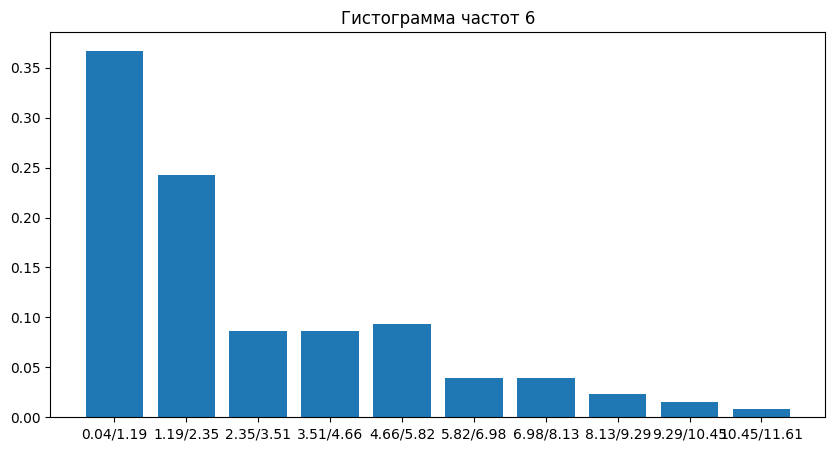

In [ ]:
#рассчитать число групп
m = ceil(3.332 * log(len(f6), 10)) + 1
print("Число групп: ", m)

#вычислить значения границ
h = (max(f6) - min(f6)) / m
print("Длина интервала:", h)
x = [min(f6) - Decimal(0.01)]
for i in range(m + 1):
  x.append(x[-1] + h)
print("Значения границ: ", x)

median = [] # середины интервалов
for i in range(len(x) - 1):
  median.append(sum(x[i:i+2]) / 2)
median = np.array(median)

#построить вариационный ряд
f6 = sorted(f6)
print("Вариационный ряд: ", f6)

#построить гистограмму
plt.title("Гистограмма частот 6")
abs_freq = np.zeros(m + 1) # абсолютная частота
for i in f6:
  j = 0
  while i > x[j + 1]:
    j += 1
  abs_freq[j] += 1

rel_freq = abs_freq / len(f6) # относительная частота
x_labels = ["/".join([str(round(x[i], 2)), str(round(x[i + 1], 2))]) for i in range(len(x) - 1)]

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams['font.size'] = 10
plt.bar(x_labels, rel_freq)
plt.show()

In [ ]:
x_v = []
for i in f6:
  h_i = 0
  while i < x[h_i]:
    h_i += 1
  x_v.append(i * Decimal(abs_freq[h_i - 1]))
x_v = np.sum(x_v) / len(f6) # выборочное среднее


s = np.std(f3)
p = []
for i in range(len(x) - 1):
  s1 = scipy.stats.norm.cdf(float((x[i + 1] - x_v) / s)) - 0.5
  s2 = scipy.stats.norm.cdf(float((x[i] - x_v) / s)) - 0.5
  p.append(s1 - s2)


abs_teor_freq = np.array(p) * len(f6)

# критическое значение
a = 0.05
k = m - 1 # число степеней свободы
ppf = scipy.stats.chi2.ppf(1-a, k - 2)

# критерий Пирсона
x_2 = sum((abs_freq - abs_teor_freq) ** 2 / abs_teor_freq)
print("Полученное значение критерия Пирсона:", x_2)
print("Критическое значение:", ppf)

print("Полученное значение критерия Пирсона больше критического значения, поэтому гипотеза (показ. распределение) отвергается")

Полученное значение критерия Пирсона: 127.24340785597241
Критическое значение: 12.591587243743977
Полученное значение критерия Пирсона больше критического значения, поэтому гипотеза (показ. распределение) отвергается


In [ ]:
lambd = float(1 / x_v)
p = []
for i in range(len(x) - 1):
  s1 = np.exp((-1) * lambd * float(x[i]))
  s2 = np.exp((-1) * lambd * float(x[i + 1]))
  p.append(float(s1) - float(s2))

abs_teor_freq = np.array(p) * len(f6)
x_2 = sum((abs_freq - abs_teor_freq) ** 2 / abs_teor_freq)

print("Полученное значение критерия Пирсона:", x_2)

ppf = scipy.stats.chi2.ppf(1-a, k - 1)
print("Критическое значение:", ppf)

print("Полученное значение критерия Пирсона меньше критического значения, поэтому гипотеза (показ. распределение) подтверждается")

Полученное значение критерия Пирсона: 7.2080503628596055
Критическое значение: 14.067140449340169
Полученное значение критерия Пирсона меньше критического значения, поэтому гипотеза (показ. распределение) подтверждается


0.7936887058826742


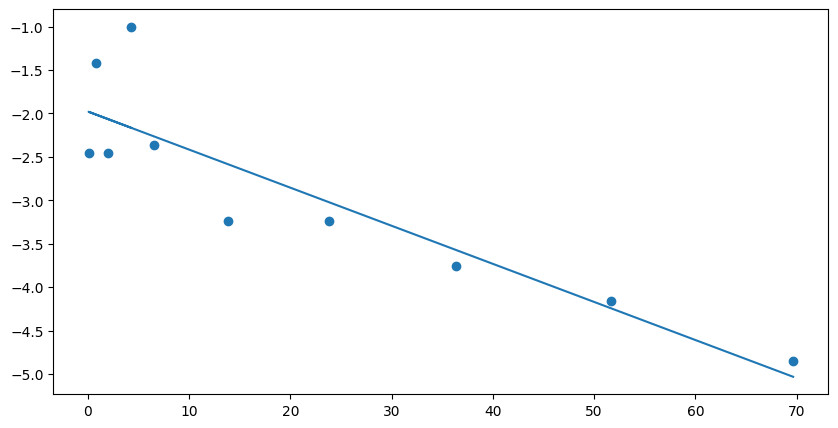

In [ ]:
y = np.log(rel_freq)
x_n = (median - x_v) ** 2
plt.scatter(x_n, y)


model = LinearRegression()
model.fit(x_n.reshape(-1, 1), y.reshape(-1, 1))
pred = model.predict(x_n.reshape(-1, 1))
plt.plot(x_n, pred)

print(r2_score(y, pred))

0.8216557561231612


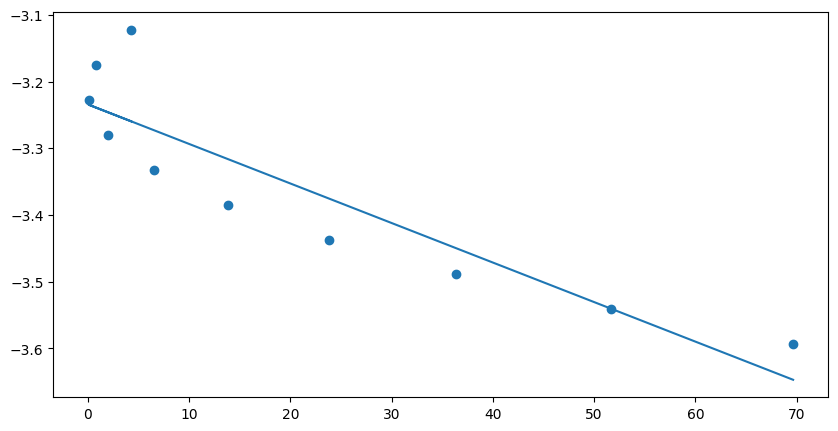

In [ ]:
std = median.std()
lambd = float(1 / (2 * std * std))
y = np.log(lambd) - lambd * np.array([float(i) for i in median])
plt.scatter(x_n, y)


model = LinearRegression()
model.fit(x_n.reshape(-1, 1), y.reshape(-1, 1))
pred = model.predict(x_n.reshape(-1, 1))
plt.plot(x_n, pred)

print(r2_score(y, pred))